**Вариант 2. Описательный анализ и визуализация данных.**

Данный вариант предполагает фокусировку на исследовании данных и визуализации. При решении этого варианта следует провести как можно более подробный описательный анализ данных с использованием максимального спектра средств визуализации. При этом следует делать значимые выводы об обнаруженных в данных закономерностях.

В этом ноутбуке я решу это задание на конкретном датасете, но стоит помнить, что подход к каждому датасету в рамках этого задания индивидуальный, поэтому я постараюсь объяснить графики и их значение, чтобы при минимальных потерях времени переделать этот ноутбук под свой датасет

Для примера возбьмём датасет https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation
Если перейдёте по ссылке, то там будет дополнительная информация о датасете

Переходите по ссылке и скачивайте датасет, нам надо скачать train.csv, но лучше будет уточнить на экзамене у чёлки.
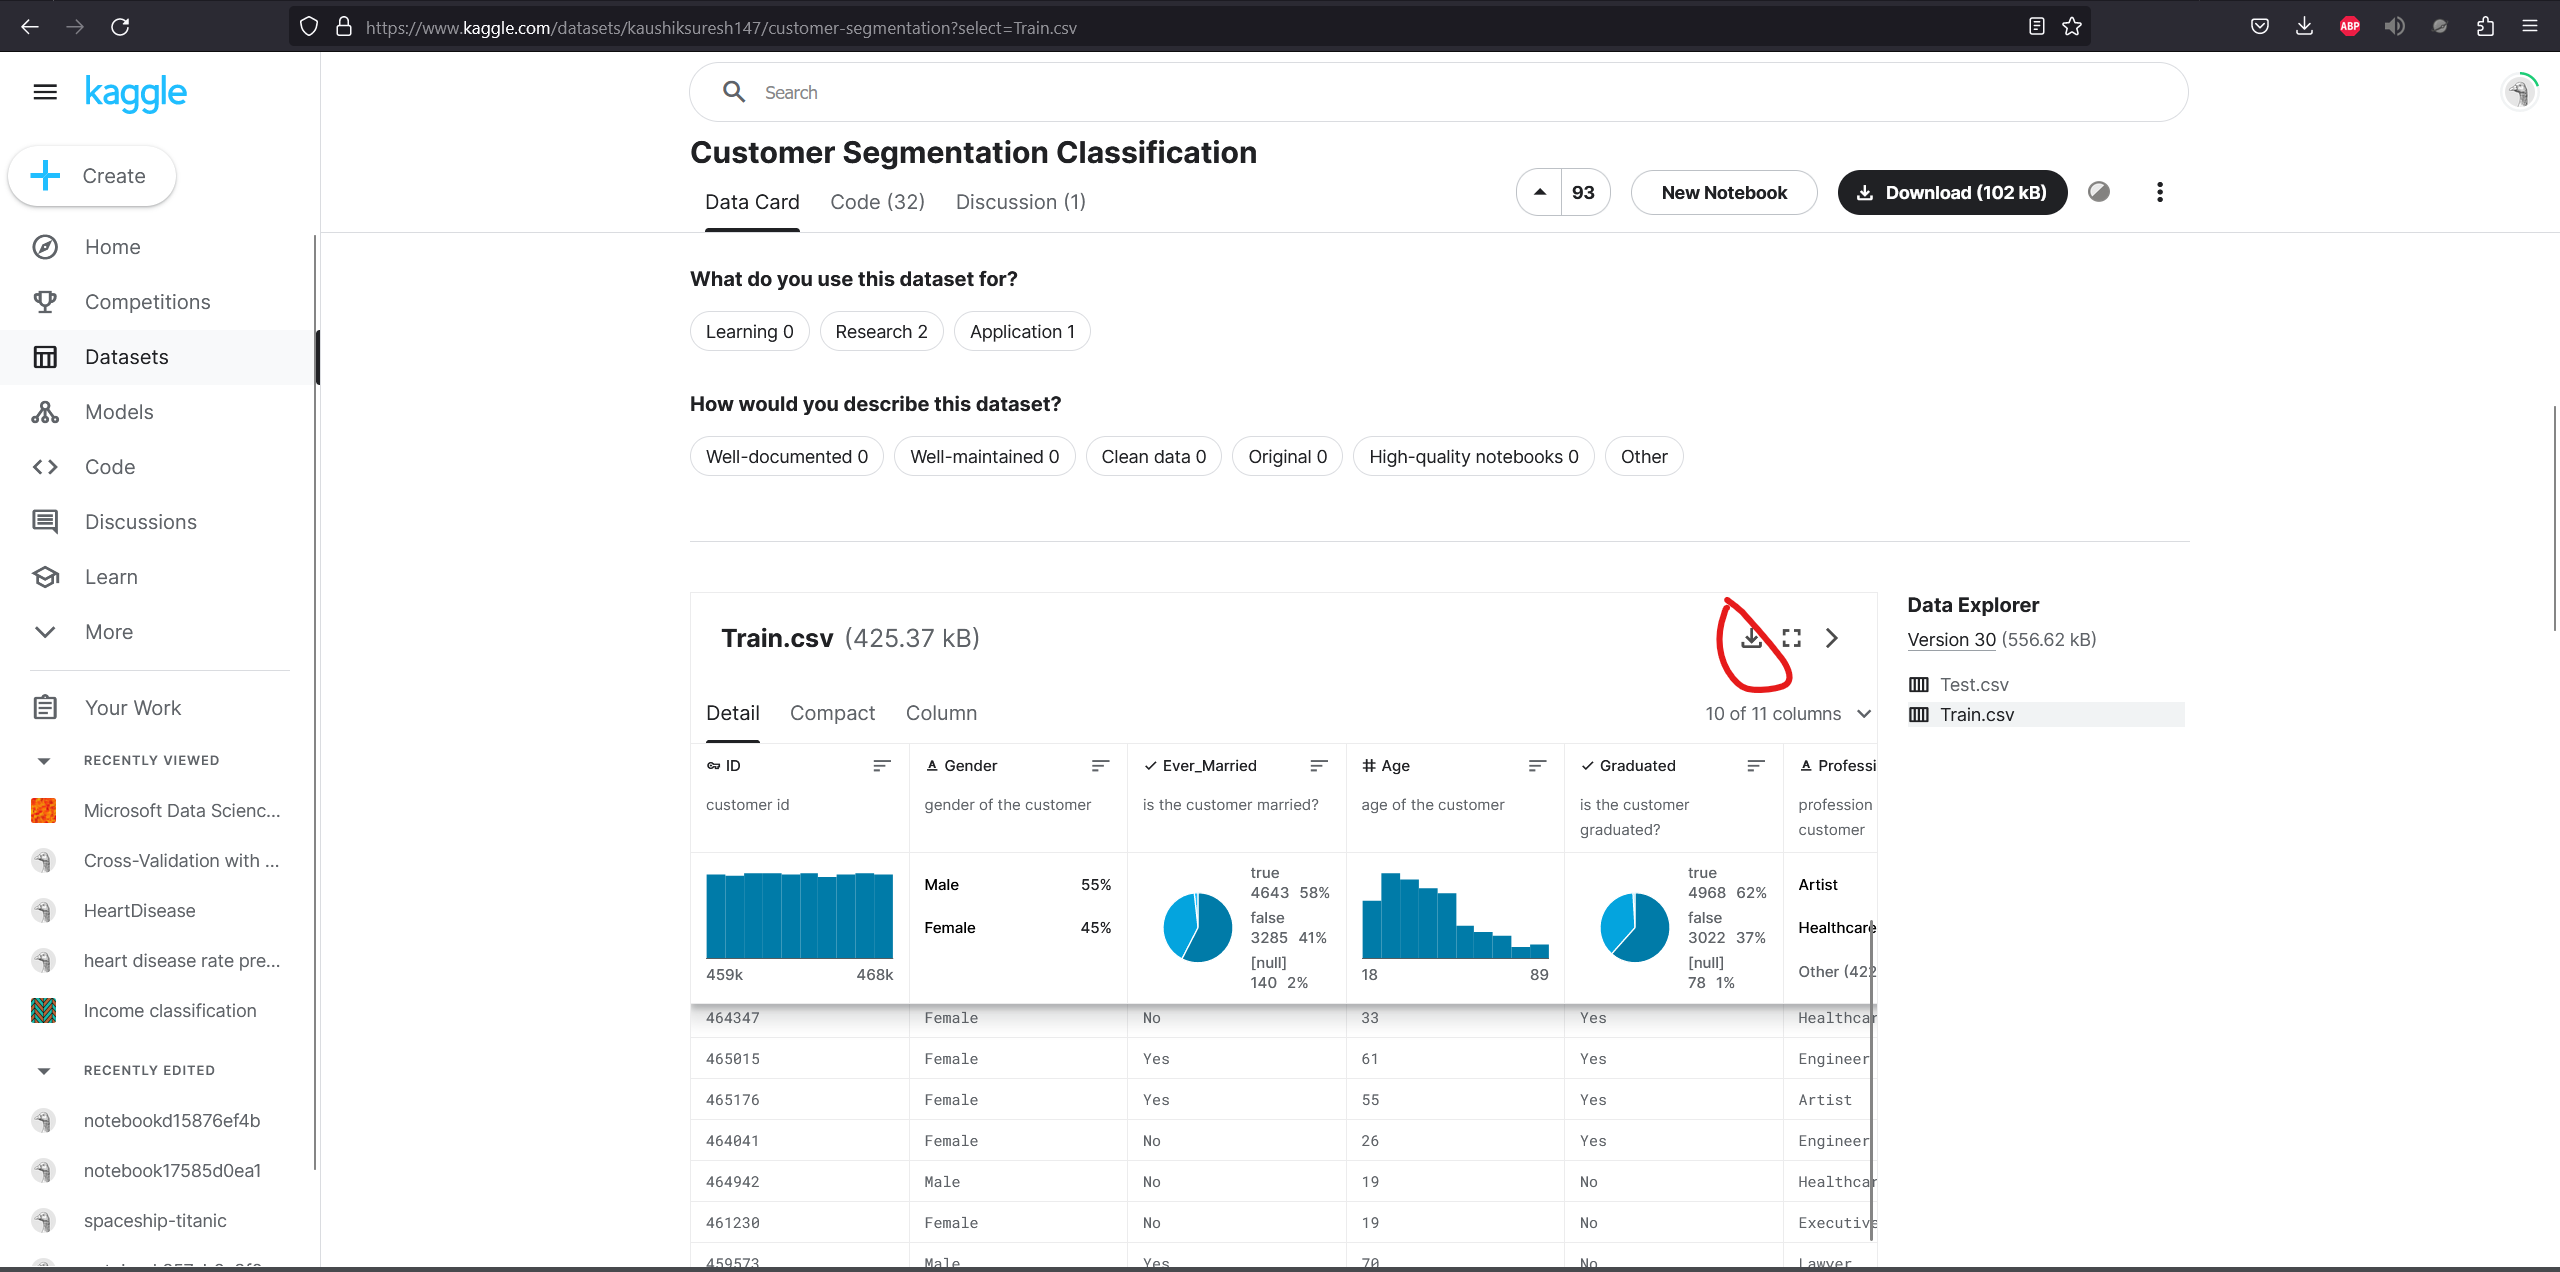

ещё там есть код, который писали другие люди, его тоже можно использовать, если он вам понадобится. посмотреть ноутбуки можно вроде бы только зарегистрированным пользователям, я не помню.
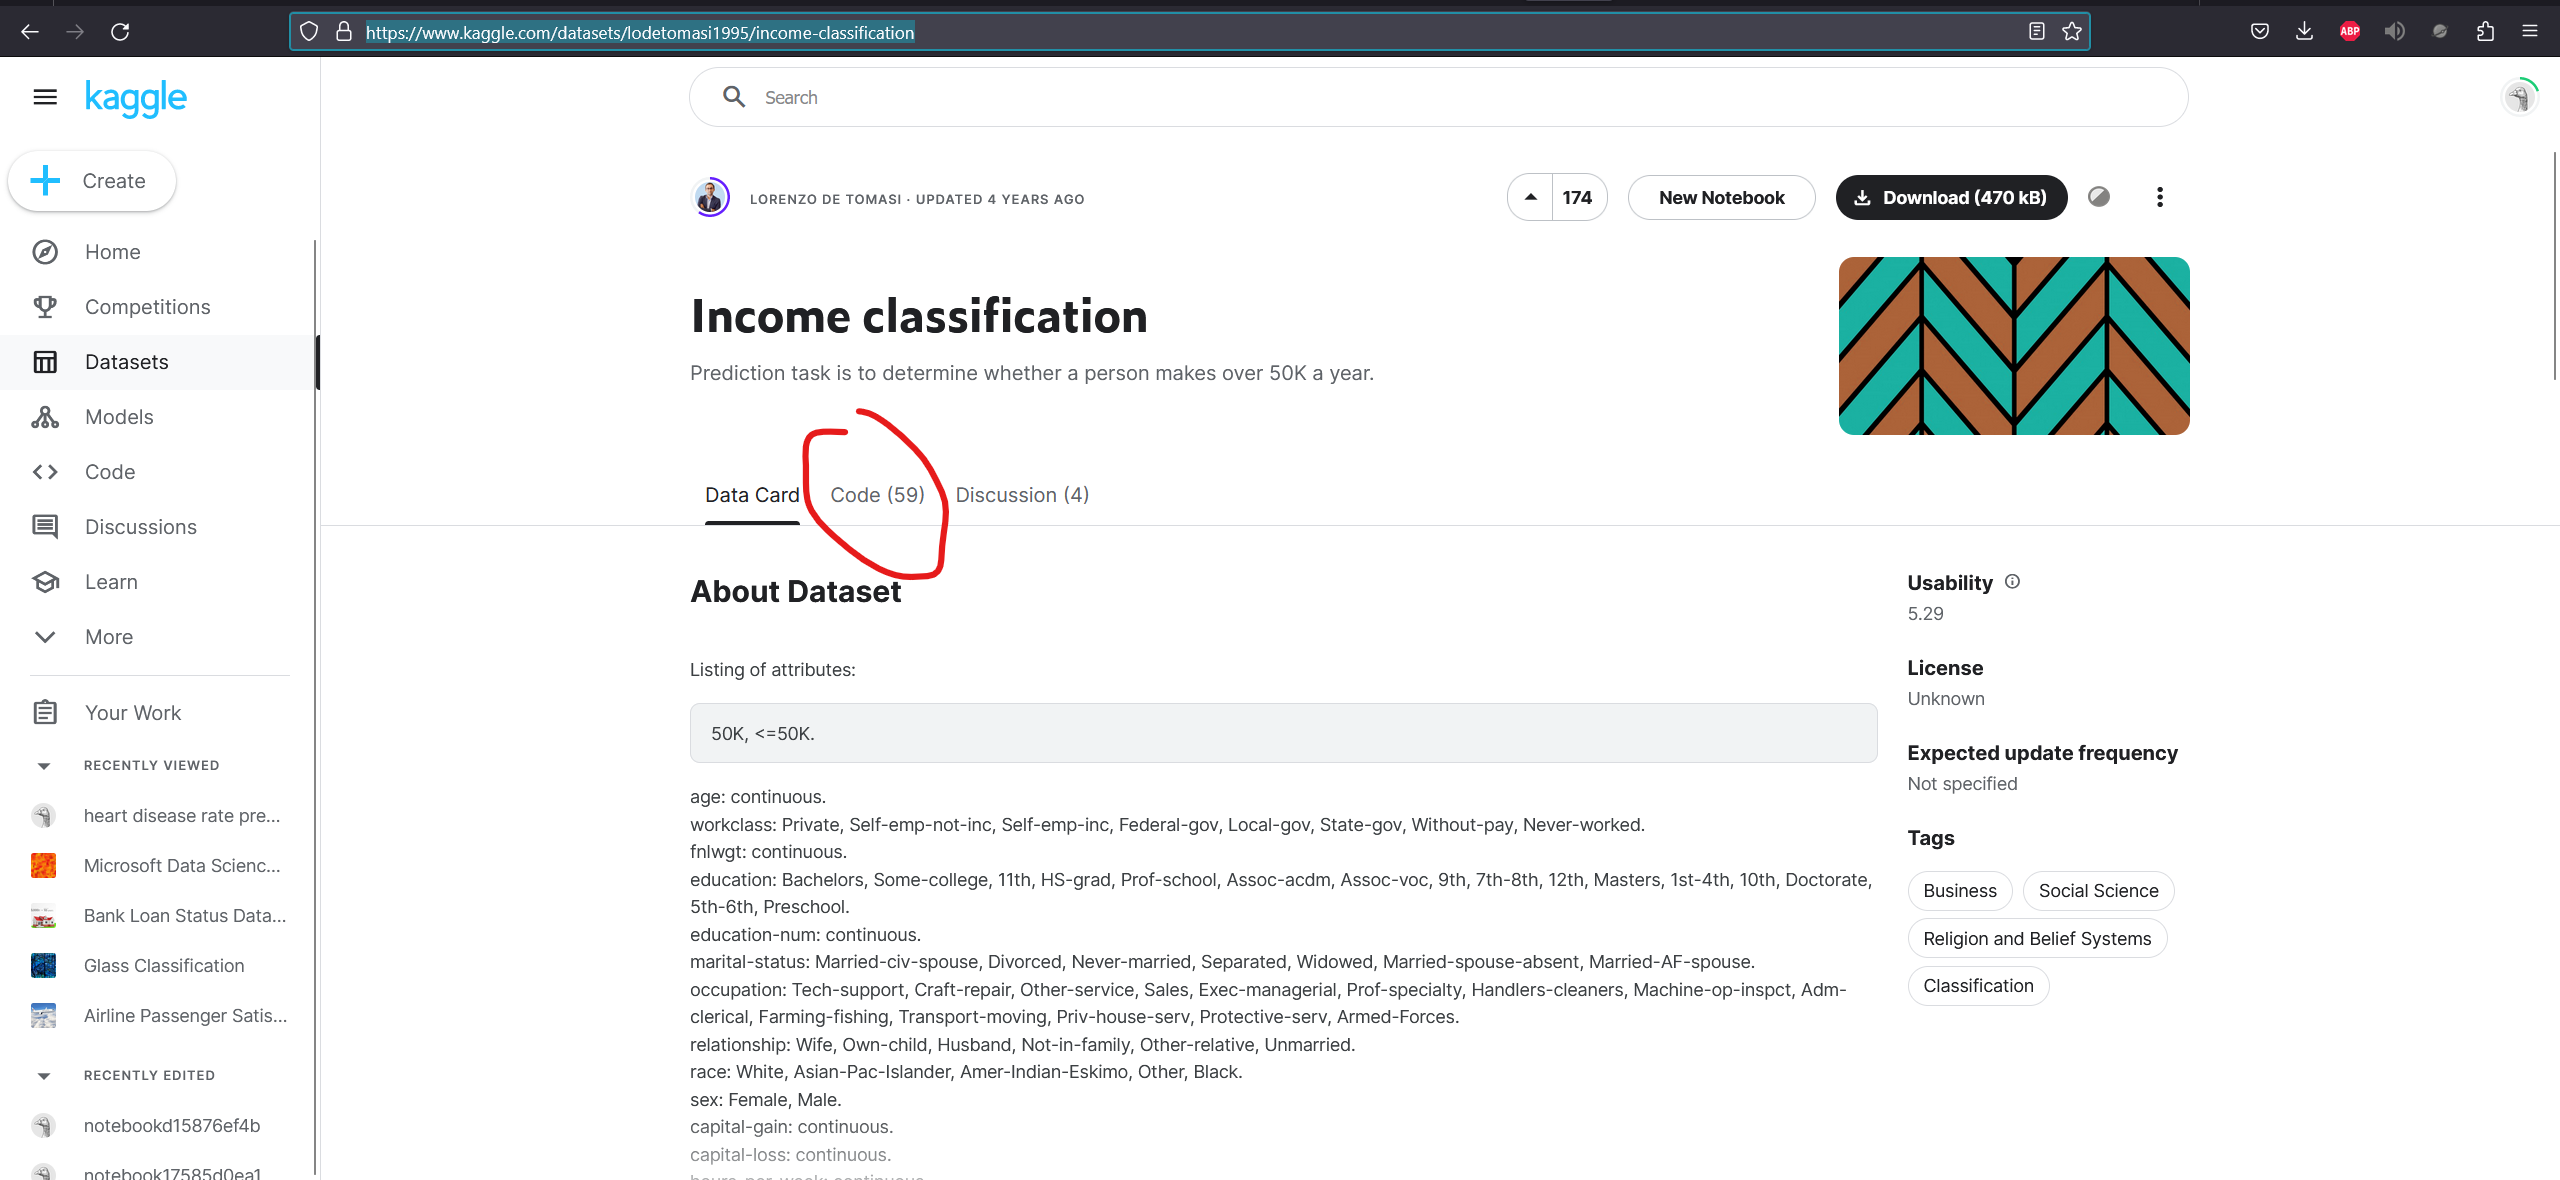

### Ниже представлено решение этой задачи.

нужно именно повторить так, как ниже, потому что чёлка доёбывается до всего.

# Вариант 2. Описательный анализ и визуализация данных. https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation

Данный вариант предполагает фокусировку на исследовании данных и визуализации. При решении этого варианта следует провести как можно более подробный описательный анализ данных с использованием максимального спектра средств визуализации. При этом следует делать значимые выводы об обнаруженных в данных закономерностях.

**Импортируем нужные библиотеки**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Предобработка данных

**Считываем данные**

In [2]:
dataset = pd.read_csv('Train.csv')
dataset.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


эту картинку вставлять не надо, показываю откуда брать описание. Достаточно просто прогнать через переводчик, но где-то перевод кривой, поэтому отредачьте
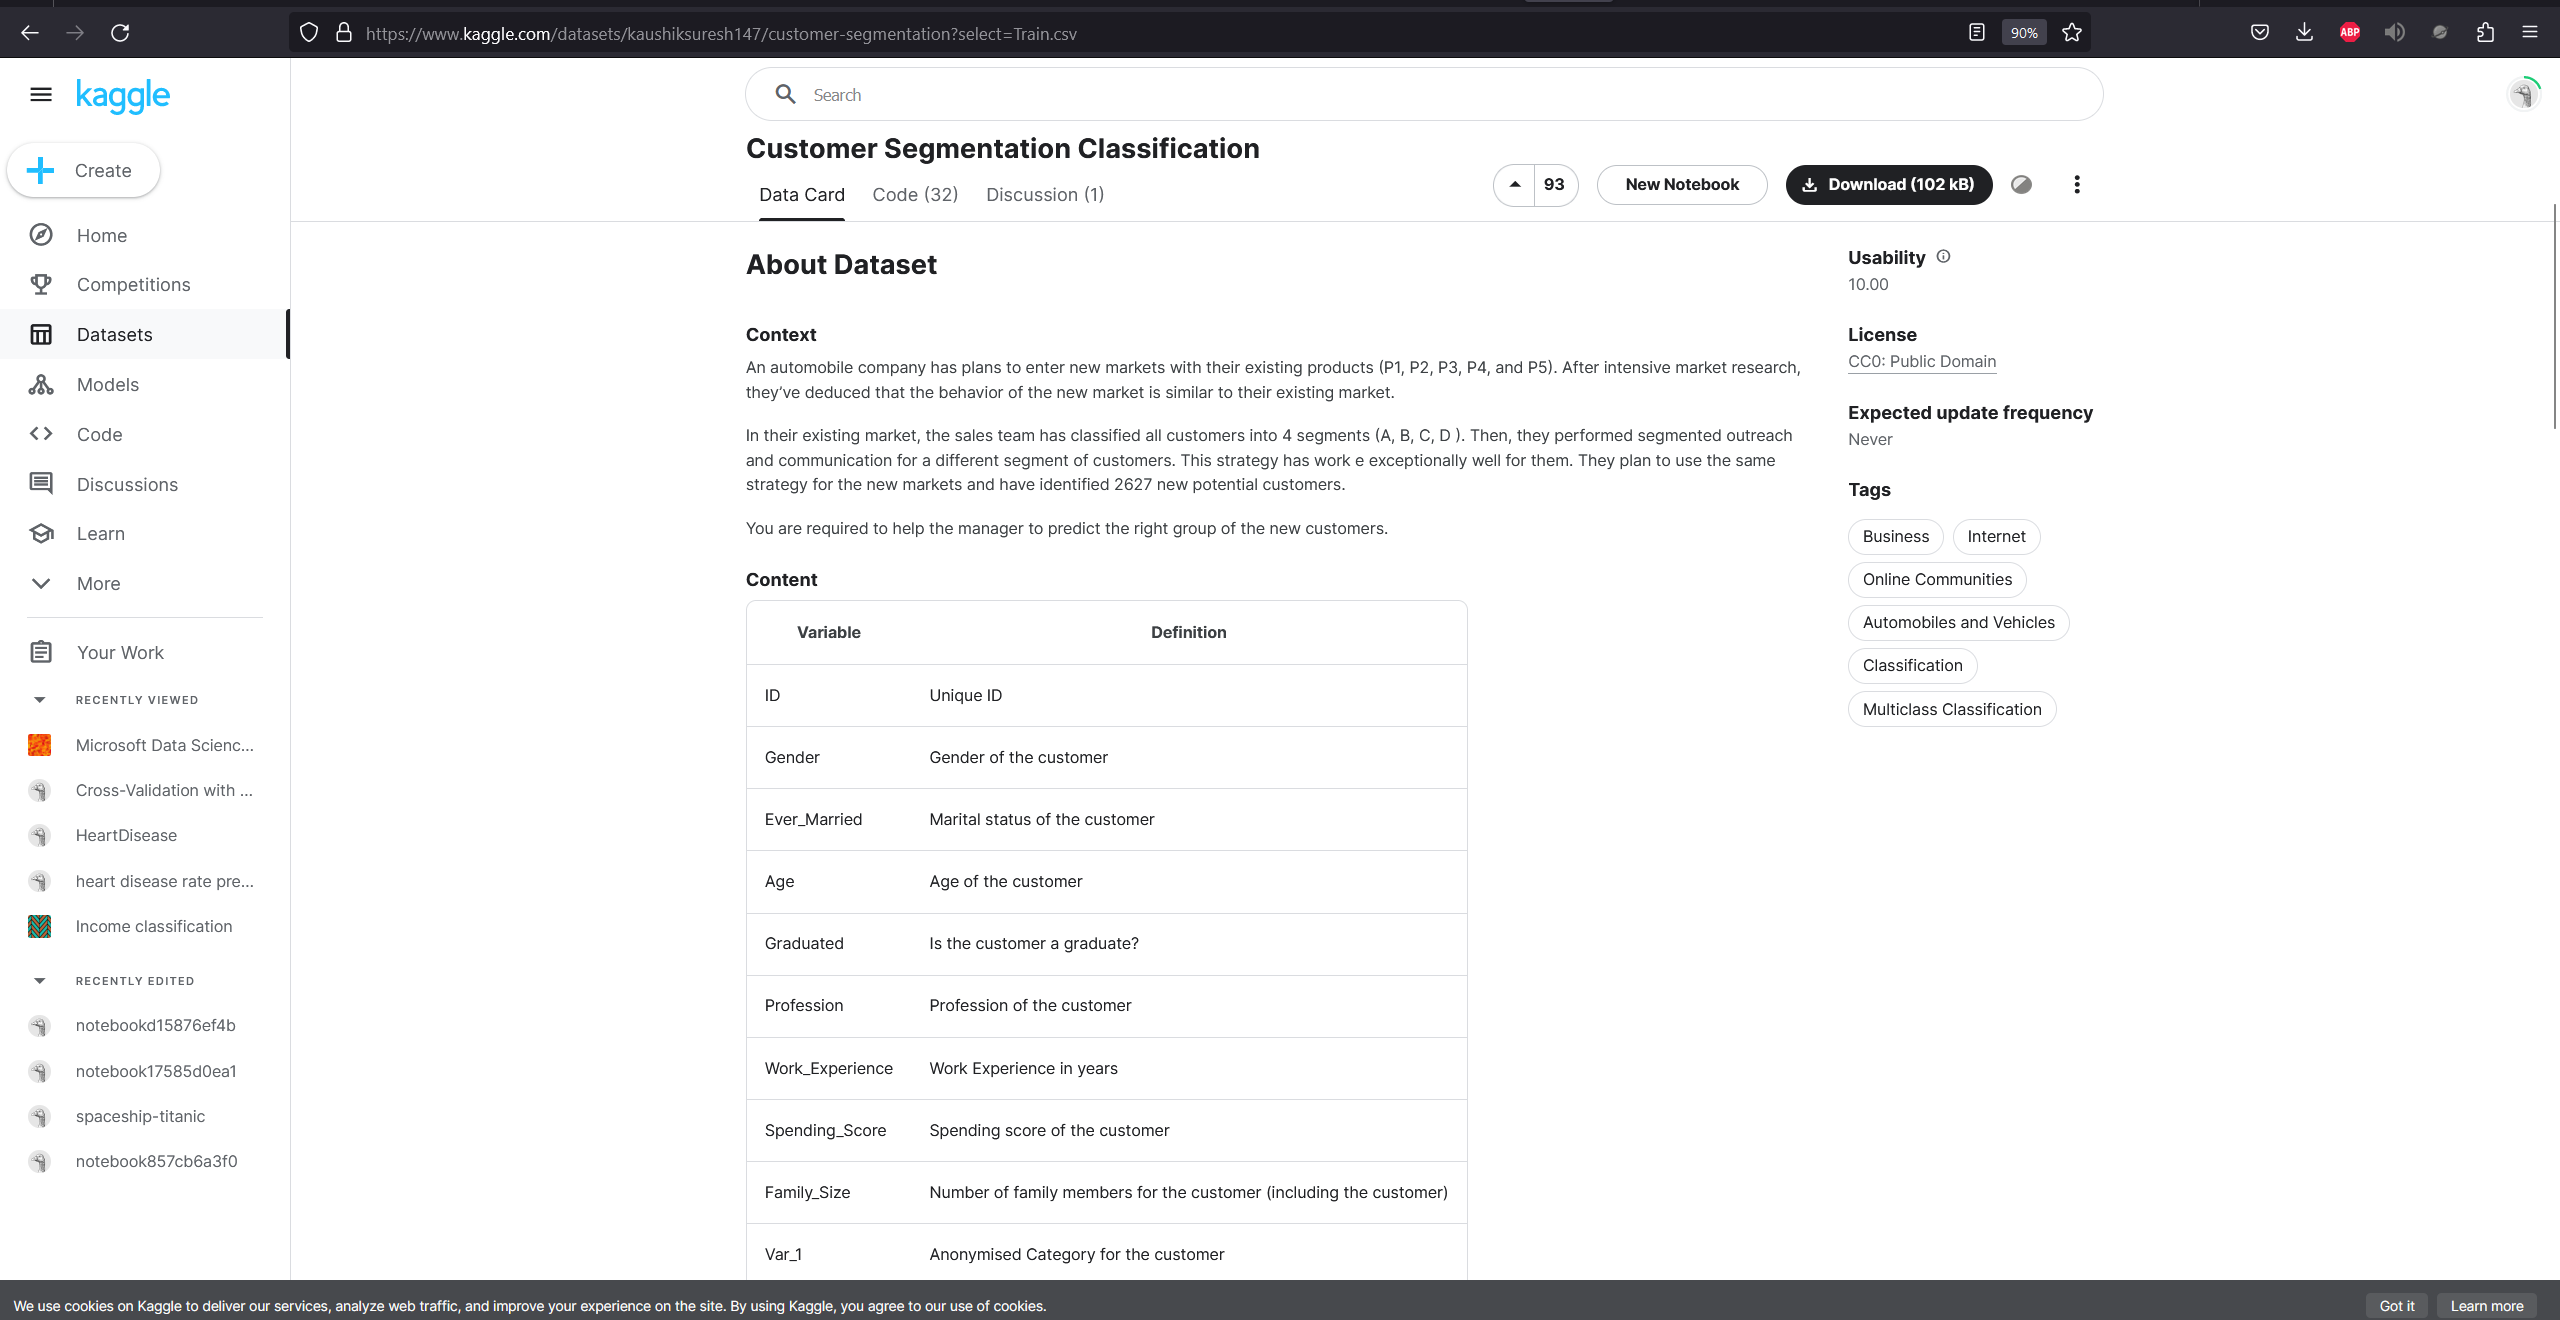

Описание датасета:

**Контекст**

Автомобильная компания планирует выйти на новые рынки со своей существующей продукцией (P1, P2, P3, P4 и P5). После интенсивного исследования рынка они пришли к выводу, что поведение нового рынка аналогично их существующему рынку.

На существующем рынке отдел продаж разделил всех клиентов на 4 сегмента (A, B, C, D). Затем они провели сегментированный охват и коммуникацию для другого сегмента клиентов. Эта стратегия сработала для них исключительно хорошо. Они планируют использовать ту же стратегию для новых рынков и выявили 2627 новых потенциальных клиентов.

От вас требуется помочь менеджеру спрогнозировать правильную группу новых клиентов.

**Содержание**

- ИДЕНТИФИКАТОР - Уникальный идентификатор
- Пол - Пол клиента
- Когда-либо состоявший в браке - Семейное положение клиента
- Возраст - Возраст клиента
- Выпускник - Является ли заказчик выпускником?
- Профессия - Профессия заказчика
- Work_Experience - Опыт работы в годах
- Spending_Score - Оценка расходов клиента
- Family_Size - Количество членов семьи для клиента (включая самого клиента)
- Var_1 - Анонимизированная категория для клиента
- Segmentation - (целевая меттка) Клиентский сегмент клиента

Этот набор данных был получен в ходе хакатона Analytics Vidhya.

**Размер датасета**

In [3]:
dataset.shape

(8068, 11)

**Основная информация о датасете**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


Вывод: ID для анализа данных не нужен сразу его удалим

In [5]:
dataset.drop(columns=["ID"], inplace=True)

**Описательная статистика числовых признаков**

In [6]:
dataset.describe() 

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


**Статистика категориальных признаков**

In [7]:
dataset.describe(include=['O']) 

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


**Матрица корреляций**

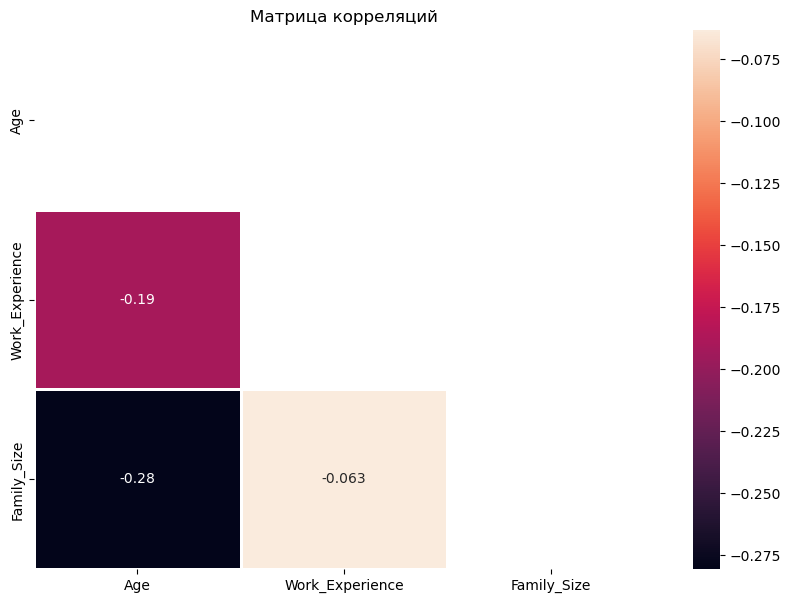

In [8]:
corr = dataset.corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (10,7))
plt.title('Матрица корреляций')
sns.heatmap(corr, mask=mask, annot=True, fmt='.2g', linewidths=2);

Вывод - высококореллированных признаков нет (однако если есть что-то от 0.35-0.4 и выше(по модулю), то стоит написать, что вот у таких-то признаков корреляция средняя, при обучении модели стоило бы удалить или как минимум поэкспериментировать - стоило ли удалять или нет)

**Проверка пропусков**

In [9]:
dataset.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Всего 8068 строк в датасете, пропусков не более 10%. Надо спросить, надо ли их удалять для дальнейшего анализа или нет

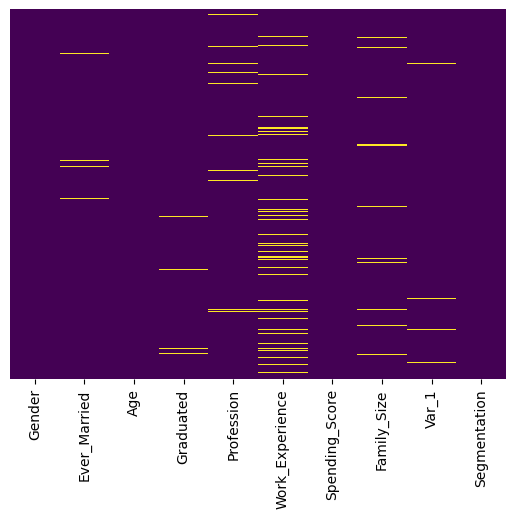

In [10]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis'); # визуализация пропусков, они показаны белым

**Подсчёт повторяющих строк в датасете**

In [11]:
len(dataset)-len(dataset.drop_duplicates())

417

Вывод - надо удалить повторяющиеся значения для дальнейшего анализа

In [12]:
dataset.drop_duplicates(inplace=True)

**Визуализация признаков**

Какие есть колонки в датасете

In [13]:
dataset.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

Здесь просто функция для построения гистограммы для _числовых_ признаков

In [14]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, int(training_set.max()) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

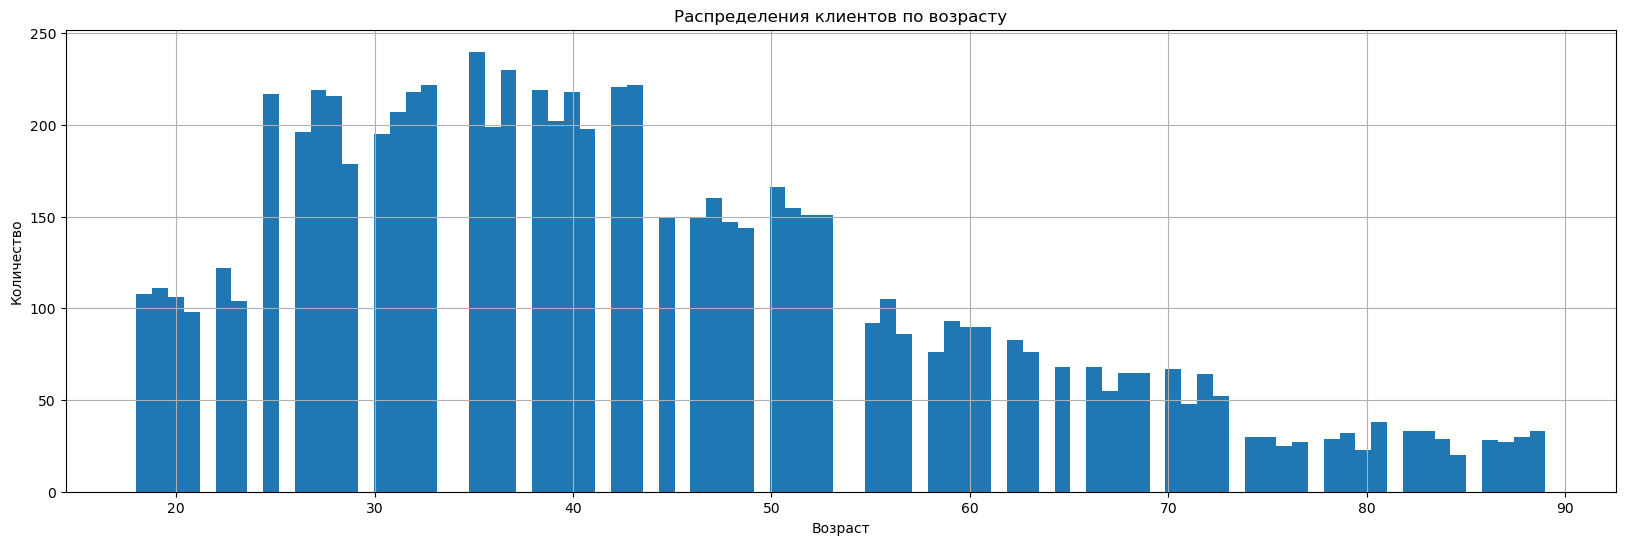

In [15]:
custom_hist(dataset["Age"], 'Распределения клиентов по возрасту', 'Возраст')

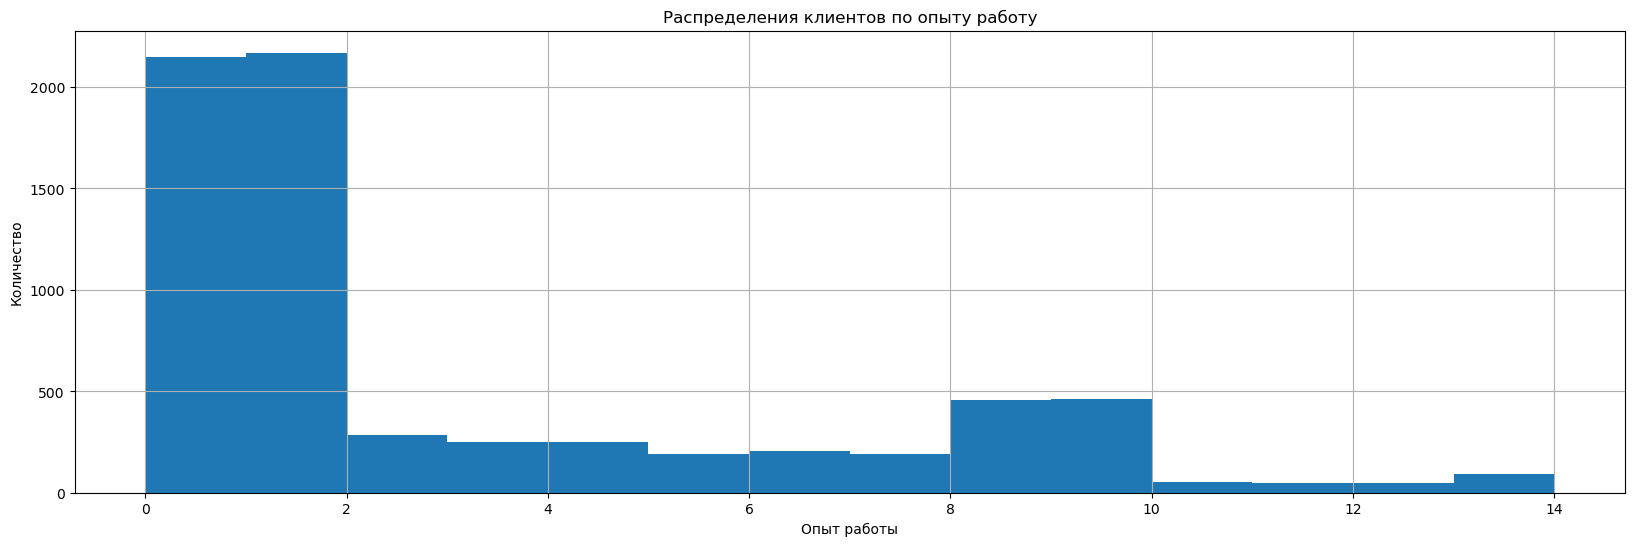

In [16]:
custom_hist(dataset["Work_Experience"], 'Распределения клиентов по опыту работу', 'Опыт работы')

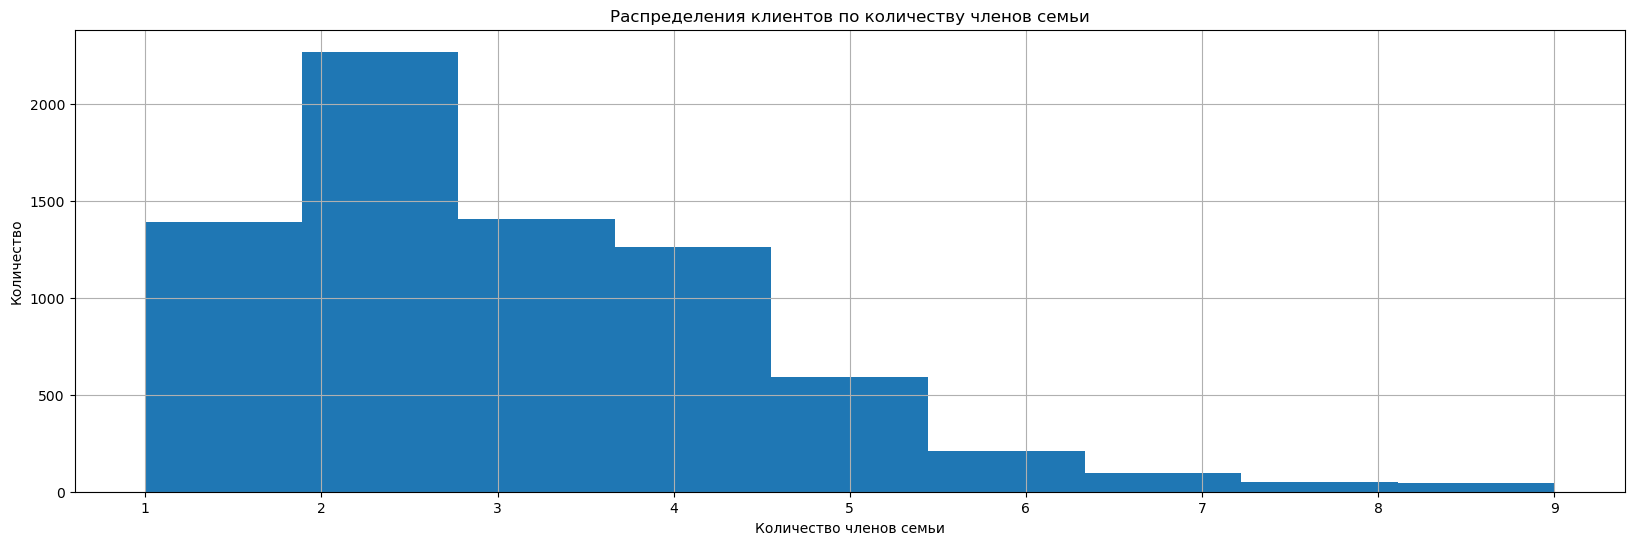

In [17]:
custom_hist(dataset["Family_Size"], 'Распределения клиентов по количеству членов семьи', 'Количество членов семьи')

Построение ящиков с усами - легкий способ показать распределение величин. Ниже его толкование
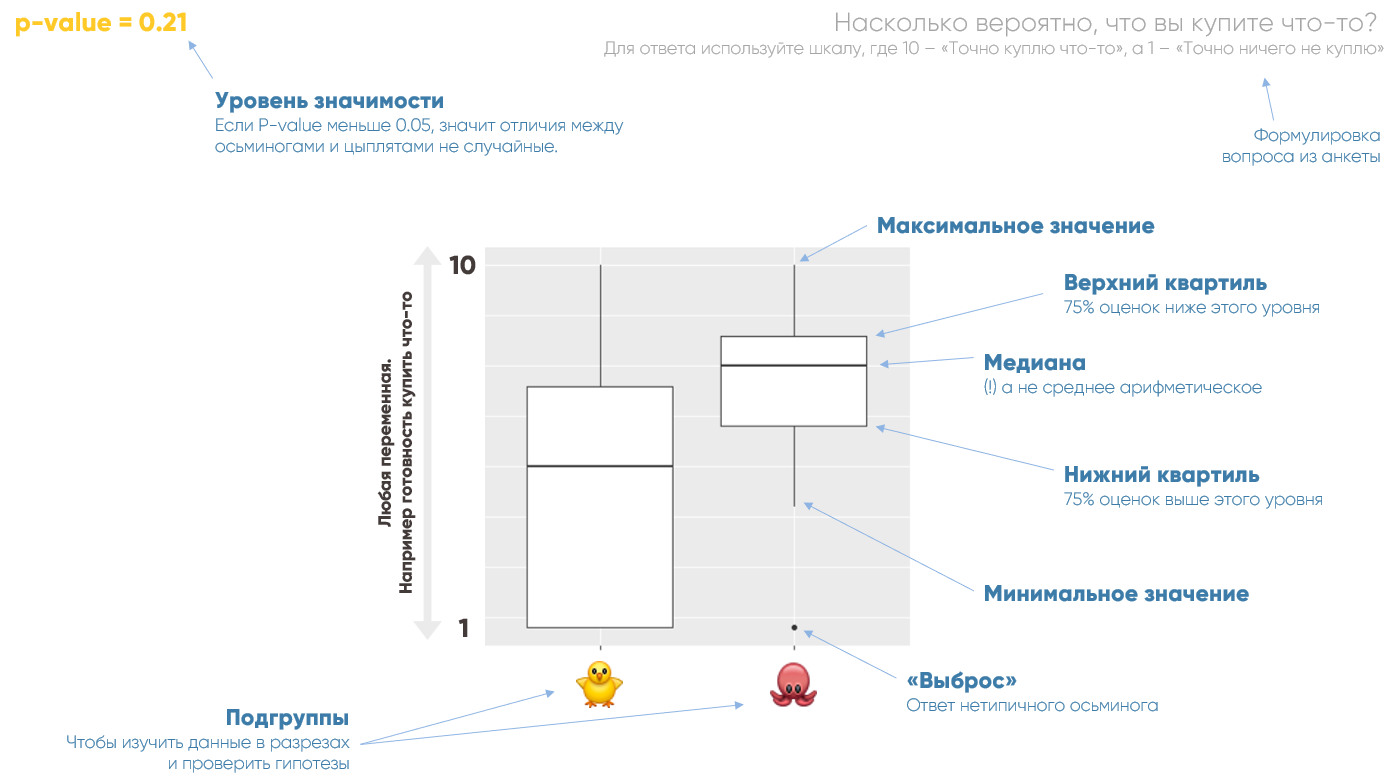
В данном случае я использую 1 аргумент boxplot'а - y, но также можно использовать и x -как на картинке, где осьминог и цыпленок

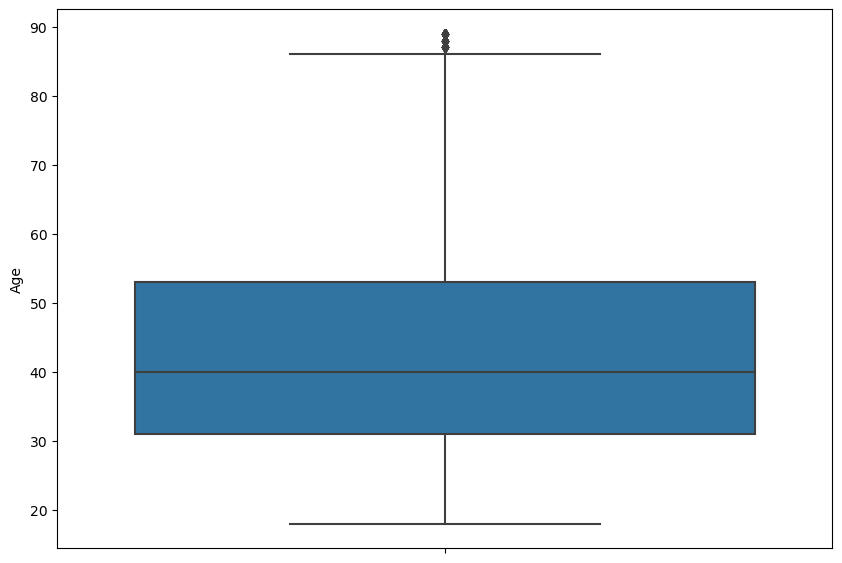

In [18]:
plt.figure(figsize = (10,7))
sns.boxplot(y=dataset['Age']);

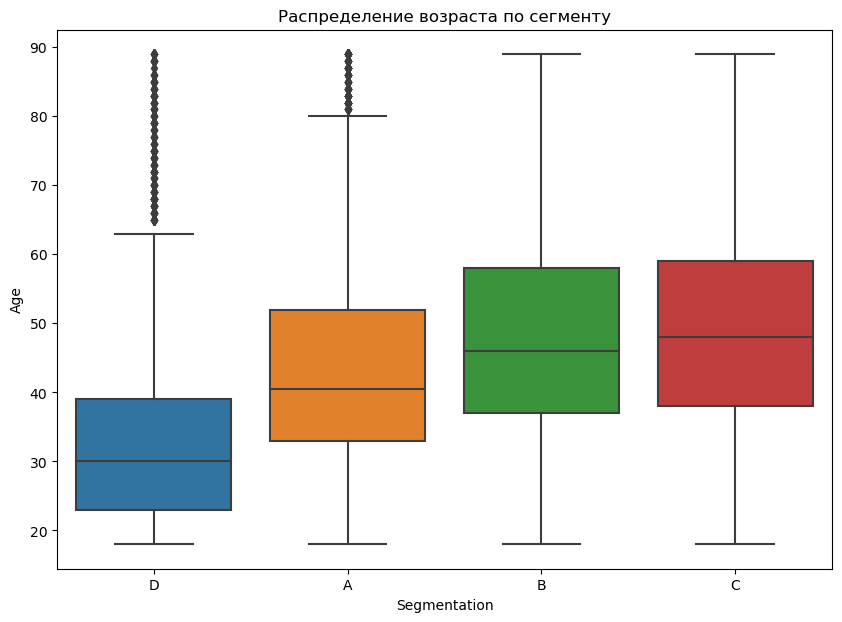

In [19]:
plt.figure(figsize = (10,7))
sns.boxplot(x='Segmentation', y='Age', data=dataset)
plt.title("Распределение возраста по сегменту")
plt.show()

Построение диаграммы рассеивания. Здесь не самый удачный пример, однако: 
- Лучше строить по высококореллированным признакам, чтобы показать зависимость двух переменных
- Лучше строить по тем переменным, где много значений (в данном случае family_size всего 9 значений)

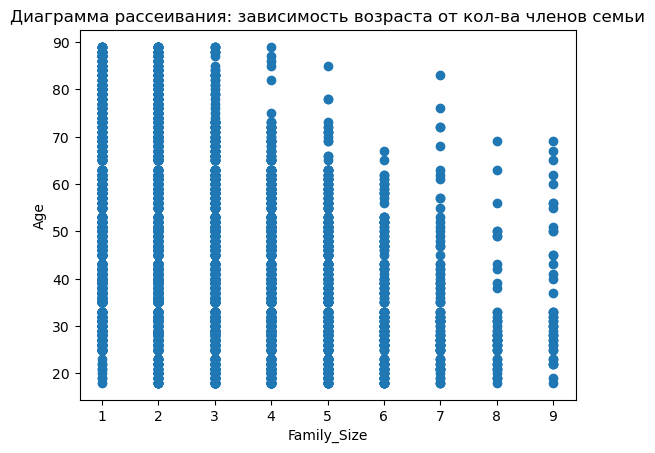

In [20]:
plt.scatter(dataset['Family_Size'], dataset['Age'])
plt.xlabel('Family_Size')
plt.ylabel('Age')
plt.title('Диаграмма рассеивания: зависимость возраста от кол-ва членов семьи')
plt.show()

Сделайте небольшие выводы по желательно по каждому из числовых признаков, много писать не надо - просто что видите на графике, то и напишите

А теперь будем анализировать категориальные признаки

График подсчёта кол-ва клиентов по сегменту

Можно использовать и для других переменных, смотря от фантазии и времени на экзамене

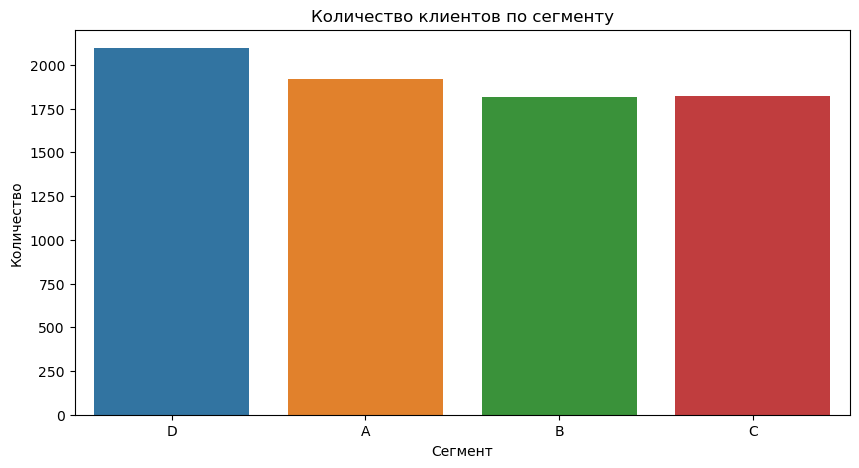

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='Segmentation', data=dataset)
plt.xlabel('Сегмент')
plt.ylabel('Количество')
plt.title('Количество клиентов по сегменту')
plt.show()

Продвинутый ящик с усами. Важно понимать, что по x или y должна быть колонка с числовыми значениями(в данном случае это Work_Experience), hue должно быть категориальным, как и другой оставшийся параметр (y или x)

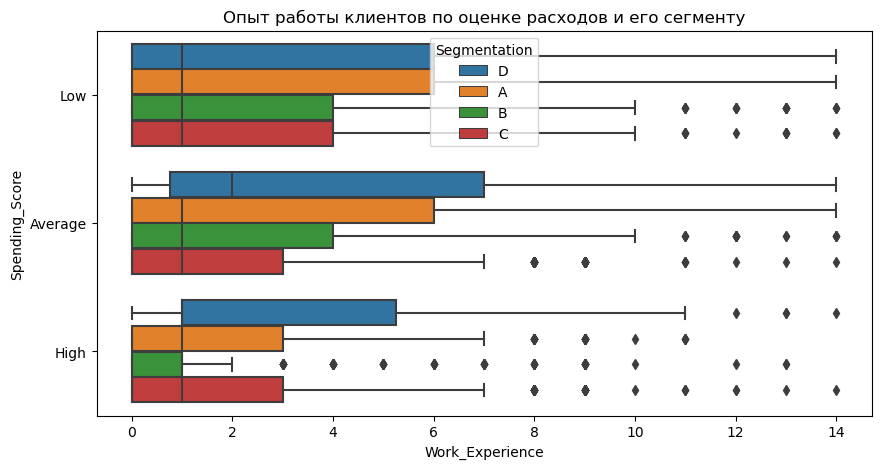

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Work_Experience', y='Spending_Score', hue='Segmentation', data=dataset)
# здесь парметр hue отвечает за разделение ящиков с усами уже внутри графика, то есть мы видим по 4 ящика на каждe.
# оценку расходов клиента (spending_score)
plt.title("Опыт работы клиентов по оценке расходов и его сегменту")
plt.show()

Пример круговой диаграммы, можно использовать для любых категориальных признаков

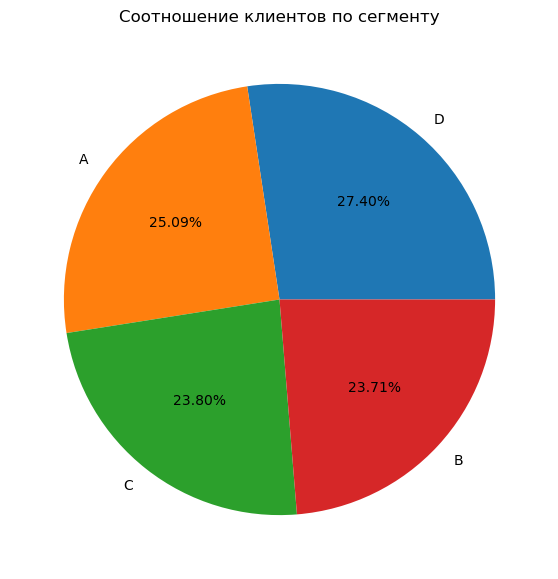

In [23]:
dataset["Segmentation"].value_counts().plot(
                 kind='pie',
                 title='Соотношение клиентов по сегменту',
                 figsize=(7, 7),
                 autopct='%.2f%%')
plt.ylabel('');

нужно проанализировать практически каждый из признаков и сделать краткие выводы по графикам. В выводе просто пишите всё, что видите на диаграммах

Если признаков много - напишите функию, которая будет клепать графики

Также берите код с kaggle, там есть много примеров